In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df=pd.read_csv("books.csv",error_bad_lines = False)
df

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [3]:
df.shape

(11123, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [5]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


# Feature ENgineering

In [6]:
from sklearn.preprocessing import OrdinalEncoder

encoding = {'language_code':{'en-US': 'eng', 'en-GB': 'eng', 'en-CA': 'eng'}} 
df.replace(encoding, inplace=True)

enc = OrdinalEncoder()
enc.fit(df[['language_code']])
df[['language_code']] = enc.fit_transform(df[['language_code']]) 

In [7]:
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors='coerce') # Convert data type of publication_date from object into date type
df[df['publication_date'].isnull()]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8177,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,2.0,718,10608,295,NaT,Bantam Books
11094,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,4.0,640,15,2,NaT,Folio histoire


In [8]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
dtype: int64

In [9]:
df.loc[df.bookID == 31373, 'publication_date'] = '1999-10-01 00:00:00'
df.loc[df.bookID == 45531, 'publication_date'] = '1975-10-01 00:00:00'

In [10]:
df['year'] = pd.DatetimeIndex(df['publication_date']).year # Extract year of publication in a separate column

df.rename(columns = {'  num_pages': 'num_pages'}, inplace=True) # Rename the column to remove leading whitespaces

In [11]:
df['num_occ'] = df.groupby('title')['title'].transform('count') # Add a new feature which has the number of occurences of each book

In [12]:
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year,num_occ
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,2.0,652,2095690,27591,2006-09-16 00:00:00,Scholastic Inc.,2006,2
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,2.0,870,2153167,29221,2004-09-01 00:00:00,Scholastic Inc.,2004,1
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,2.0,352,6333,244,2003-11-01 00:00:00,Scholastic,2003,2
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,2.0,435,2339585,36325,2004-05-01 00:00:00,Scholastic Inc.,2004,2
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,2.0,2690,41428,164,2004-09-13 00:00:00,Scholastic,2004,1


In [13]:
df['rate_occ'] = df['average_rating'] * df['num_occ']
df['rate_weight'] = df['average_rating'] * df['text_reviews_count']
df['rate_weight_2'] = df['average_rating'] * df['ratings_count']
df['rate_per_pages'] = df['average_rating'] * df['num_pages']

# Exploratory Data Analysis

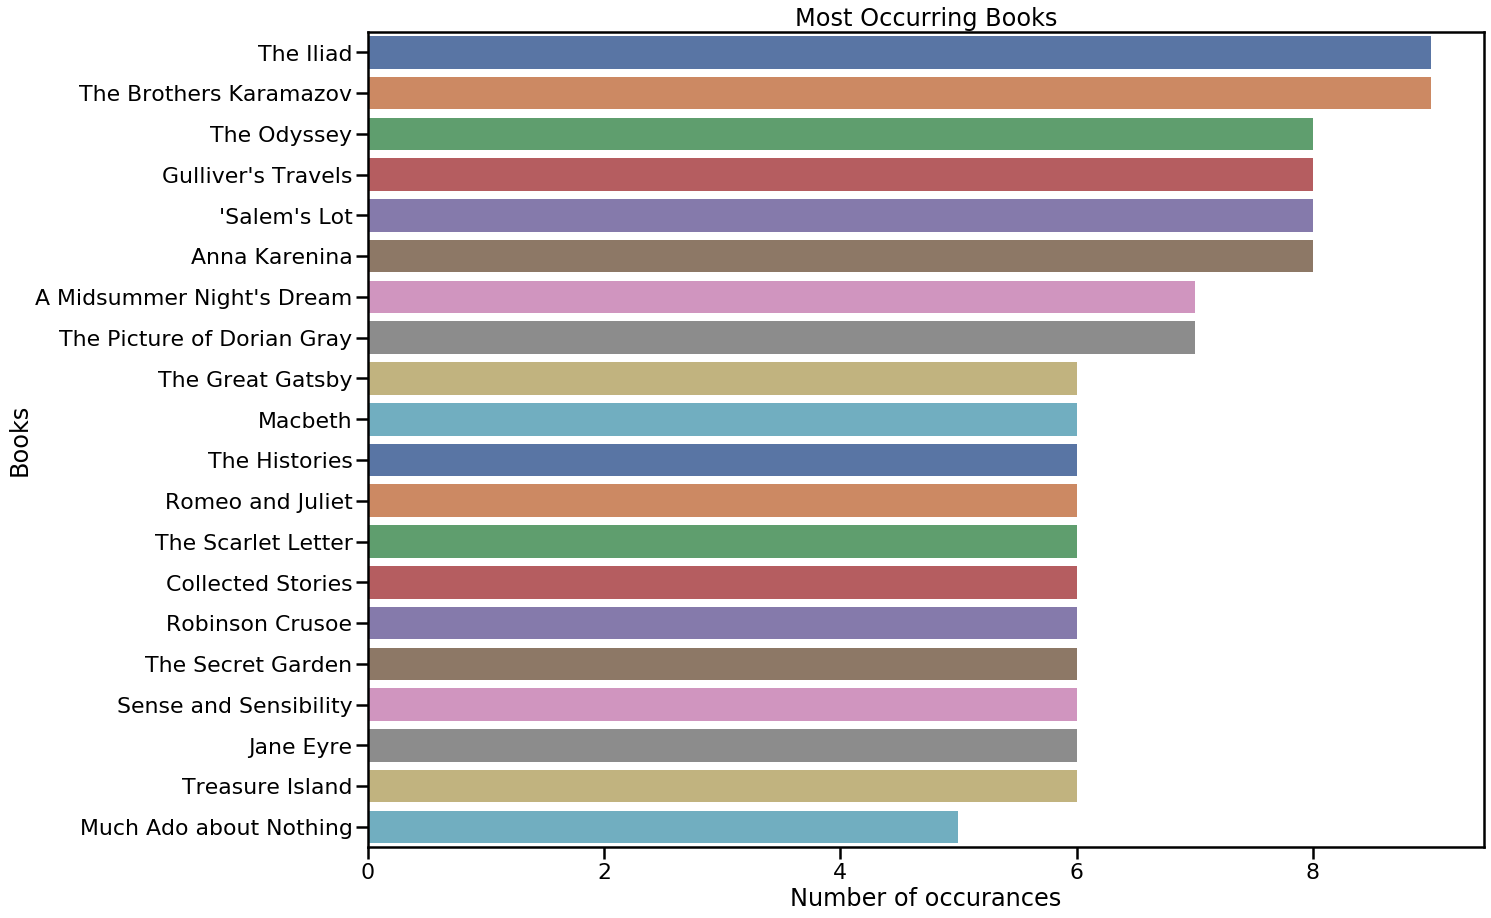

In [14]:
sns.set_context('poster')
plt.figure(figsize=(20,15))
books = df['title'].value_counts()[:20]
rating = df.average_rating[:20]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

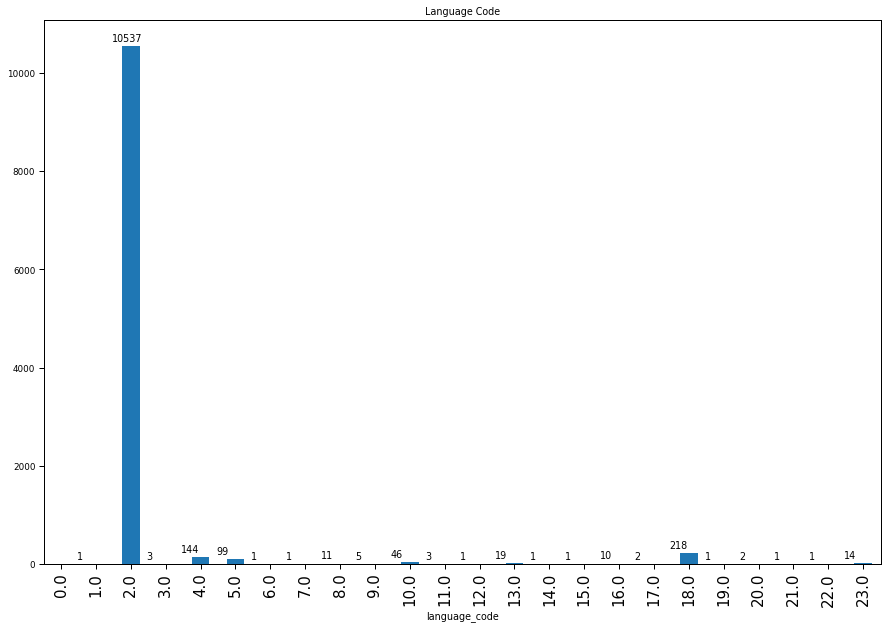

In [15]:
sns.set_context('paper')
plt.figure(figsize=(15,10))
ax = df.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

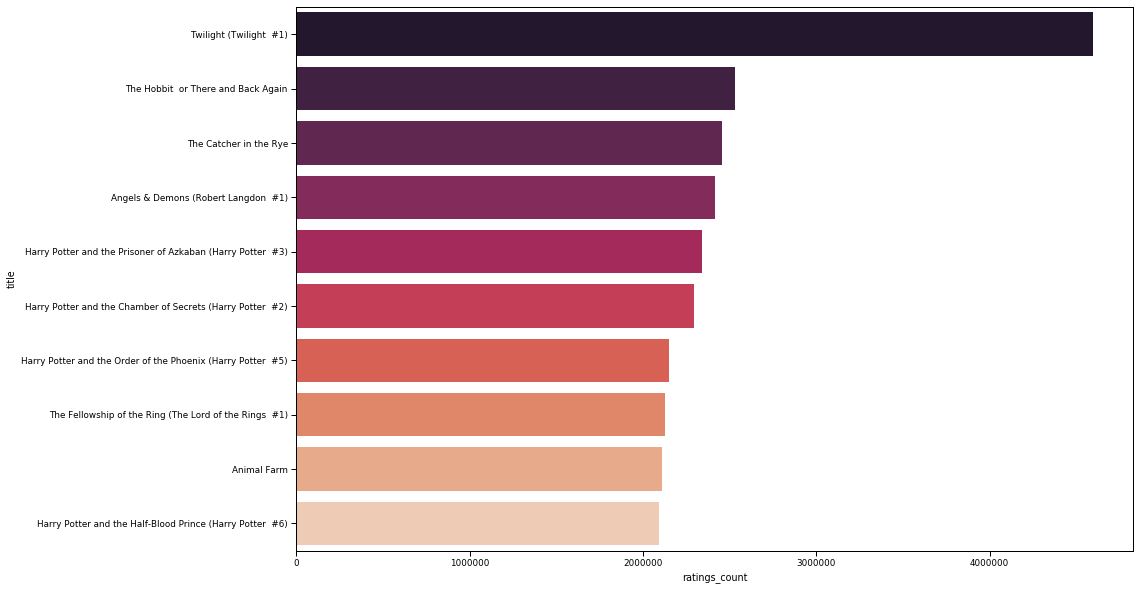

In [16]:
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='rocket')

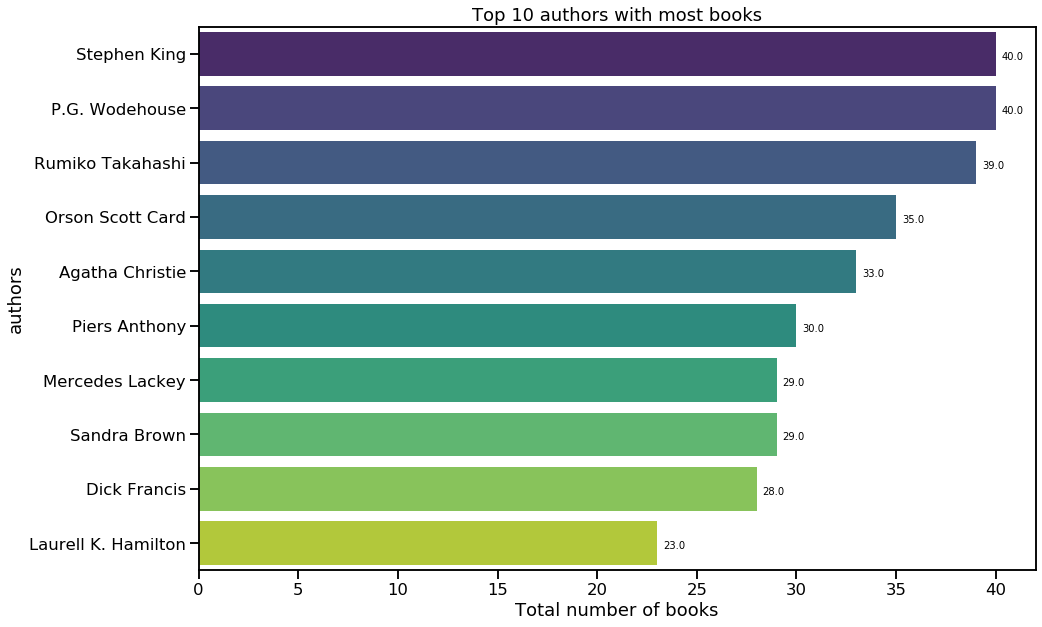

In [17]:
sns.set_context('talk')
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='viridis')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

Text(0.5, 0, 'Average rating')

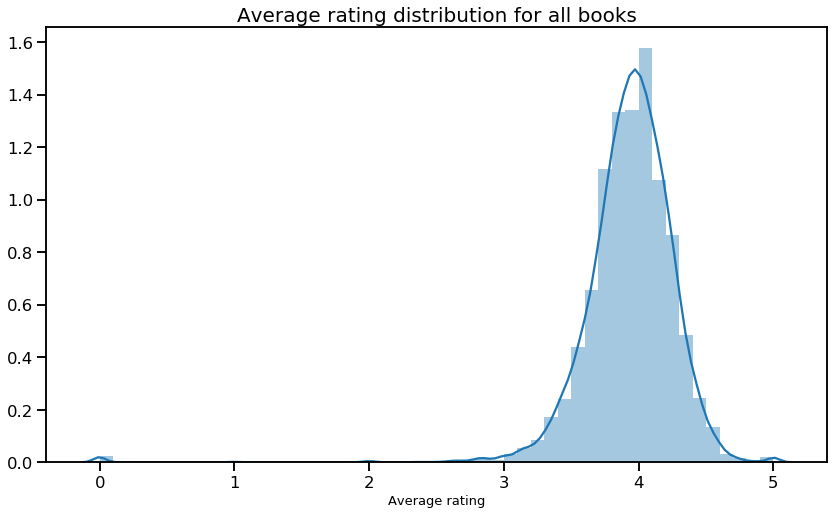

In [18]:
dist = df
dist.average_rating = dist.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
sns.distplot(dist['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

In [19]:
label = df['average_rating'].values
df.drop(['bookID', 'title', 'authors', 'isbn', 'isbn13', 'publication_date', 'publisher', 'average_rating'], axis=1, inplace=True)

In [20]:
authors= ['Stephen King', 'Agatha Christie', 'Dan Brown', 'J.K. Rowling']


In [21]:
df.drop(['language_code'], axis=1, inplace=True)

In [22]:
# Split the Data into 70% - 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3)

# Decision Tree Regressor

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4))

parameters = {
    'learning_rate': [0.001, 0.01, 0.02, 0.1, 0.2, 1.0],
    'n_estimators': [10, 50, 100, 200]
}

grad_Ada = GridSearchCV(model, parameters, refit=True)
grad_Ada.fit(X_train, y_train)

print('Best Score: ', grad_Ada.best_score_*100, '\nBest Parameters: ', grad_Ada.best_params_)

Best Score:  94.08419029728904 
Best Parameters:  {'learning_rate': 0.02, 'n_estimators': 200}


# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

model  = LinearRegression()

parameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    
}

grad_Linear = GridSearchCV(model, parameters, refit=True)
grad_Linear.fit(X_train, y_train)

print('Best Score: ', grad_Linear.best_score_*100, '\nBest Parameters: ', grad_Linear.best_params_)

Best Score:  81.04978400988907 
Best Parameters:  {'fit_intercept': True, 'normalize': True}


# Ridge Regressor

In [25]:
from sklearn.linear_model import Ridge

model = Ridge()

parameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': [1000, 100, 10000],
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grad_ridge = GridSearchCV(model, parameters, refit=True)
grad_ridge.fit(X_train, y_train)

print('Best Score: ', grad_ridge.best_score_*100, '\nBest Parameters: ', grad_ridge.best_params_)

Best Score:  81.05012638175062 
Best Parameters:  {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False}


# Random Forest 

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10, 12, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15]
}

grad_rf = GridSearchCV(model, parameters, refit=True, cv=10)
grad_rf.fit(X_train, y_train)

print('Best Score: ', grad_rf.best_score_*100, '\nBest Parameters: ', grad_rf.best_params_)

In [26]:
l = []
l.append(('AdaBoost', grad_Ada.best_score_*100))
l.append(('Linear Regression', grad_Linear.best_score_*100))
l.append(('Ridge Regression', grad_ridge.best_score_*100))
scores = pd.DataFrame(l, columns =['Model', 'Train Score'])

# Make Prediction

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [28]:
# AdaBoost Model
pred_adaboost = grad_Ada.predict(X_test)

# Check Model Score
print("Residual sum of squares: ",  np.mean((pred_adaboost - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, pred_adaboost))))
print('Model Score on Test Data: ', grad_Ada.score(X_test, y_test))

Residual sum of squares:  0.006453403670630911
RMSE: 0.08033307955401008
Model Score on Test Data:  0.9472728893713834


In [30]:
from eli5.sklearn import PermutationImportance
import eli5
perm = PermutationImportance(grad_Ada.best_estimator_, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

/home/akshat/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/akshat/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
1.9002 ± 0.0364,rate_occ
0.2598 ± 0.0252,num_occ
0.0003 ± 0.0010,rate_per_pages
0.0002 ± 0.0001,ratings_count
0.0000 ± 0.0000,rate_weight_2
0.0000 ± 0.0000,rate_weight
0.0000 ± 0.0000,text_reviews_count
0 ± 0.0000,year
-0.0002 ± 0.0001,num_pages


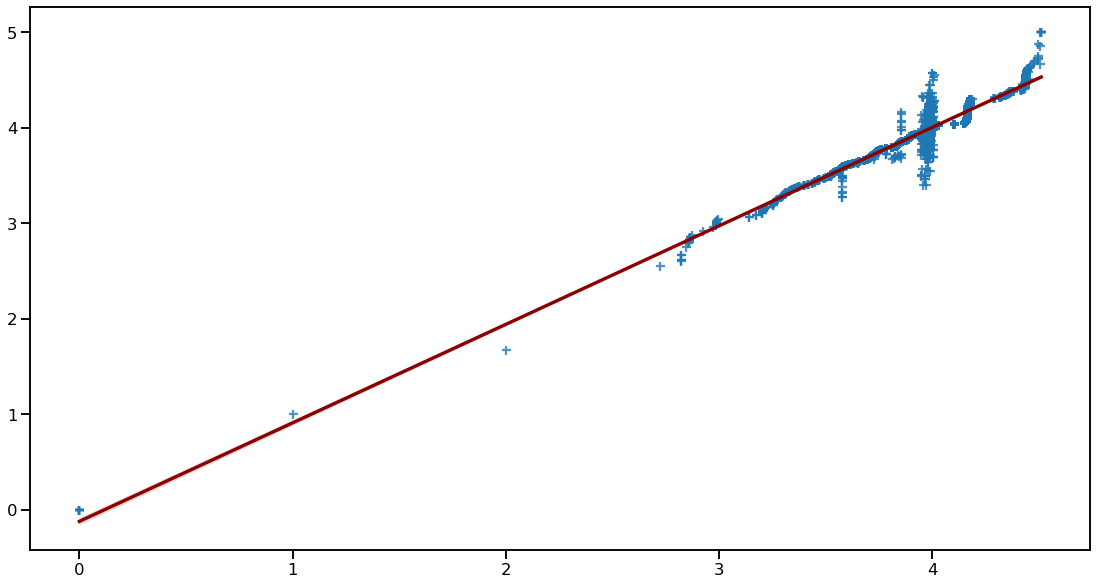

In [31]:
plt.figure(figsize=(19,10))
sns.regplot(pred_adaboost, y_test, marker="+", line_kws={'color':'darkred','alpha':1.0})

In [32]:
# Linear Regression Model
pred_lr = grad_Linear.predict(X_test)

# Check Model Score
print("Residual sum of squares: ",  np.mean((pred_lr - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, pred_lr))))
print('Model Score on Test Data: ', grad_Linear.score(X_test, y_test))

Residual sum of squares:  0.02200157818285549
RMSE: 0.14832928969982795
Model Score on Test Data:  0.8202375512117679


In [33]:
perm = PermutationImportance(grad_Linear.best_estimator_, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
59.1242 ± 2.2227,rate_occ
56.7955 ± 3.2840,num_occ
10.4110 ± 0.3113,rate_per_pages
9.6498 ± 0.2253,num_pages
0.7297 ± 0.0169,rate_weight_2
0.6523 ± 0.1103,ratings_count
0.4313 ± 0.0164,text_reviews_count
0.4228 ± 0.0075,rate_weight
-0.0000 ± 0.0000,year


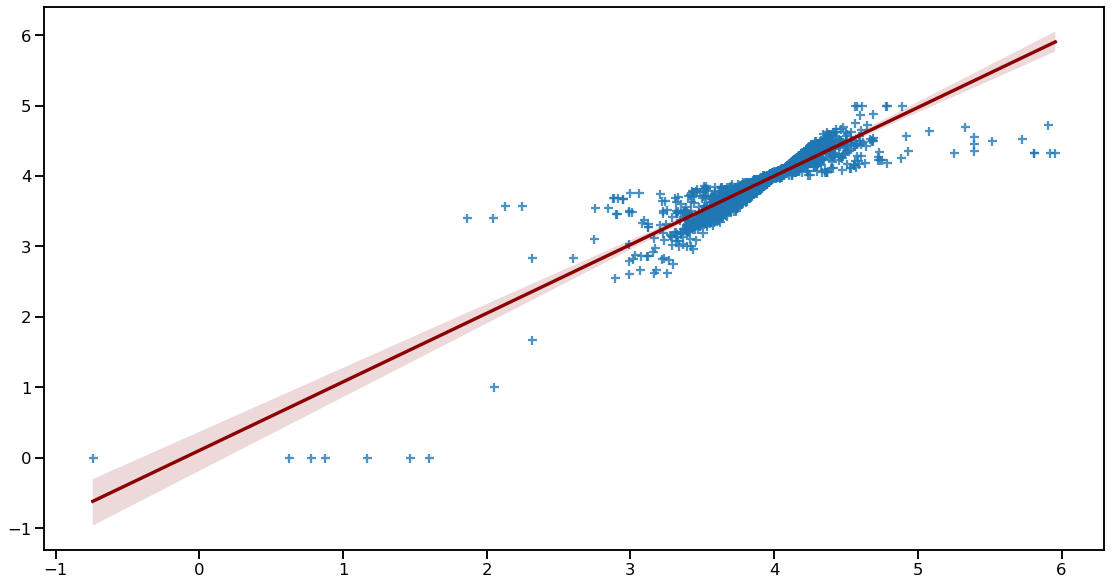

In [34]:
plt.figure(figsize=(19,10))
sns.regplot(pred_lr, y_test, marker="+", line_kws={'color':'darkred','alpha':1.0})

In [35]:
# Ridge Regression Model
pred_ridge = grad_ridge.predict(X_test)

# Check Model Score
print("Residual sum of squares: ",  np.mean((pred_ridge - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, pred_ridge))))
print('Model Score on Test Data: ', grad_ridge.score(X_test, y_test))

Residual sum of squares:  0.0219997556154814
RMSE: 0.1483231459195813
Model Score on Test Data:  0.8202524423787344


In [36]:
perm = PermutationImportance(grad_ridge.best_estimator_, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
58.8916 ± 2.2142,rate_occ
56.5704 ± 3.2712,num_occ
10.4792 ± 0.3133,rate_per_pages
9.7128 ± 0.2267,num_pages
0.7286 ± 0.0168,rate_weight_2
0.6514 ± 0.1102,ratings_count
0.4319 ± 0.0164,text_reviews_count
0.4235 ± 0.0075,rate_weight
-0.0000 ± 0.0000,year


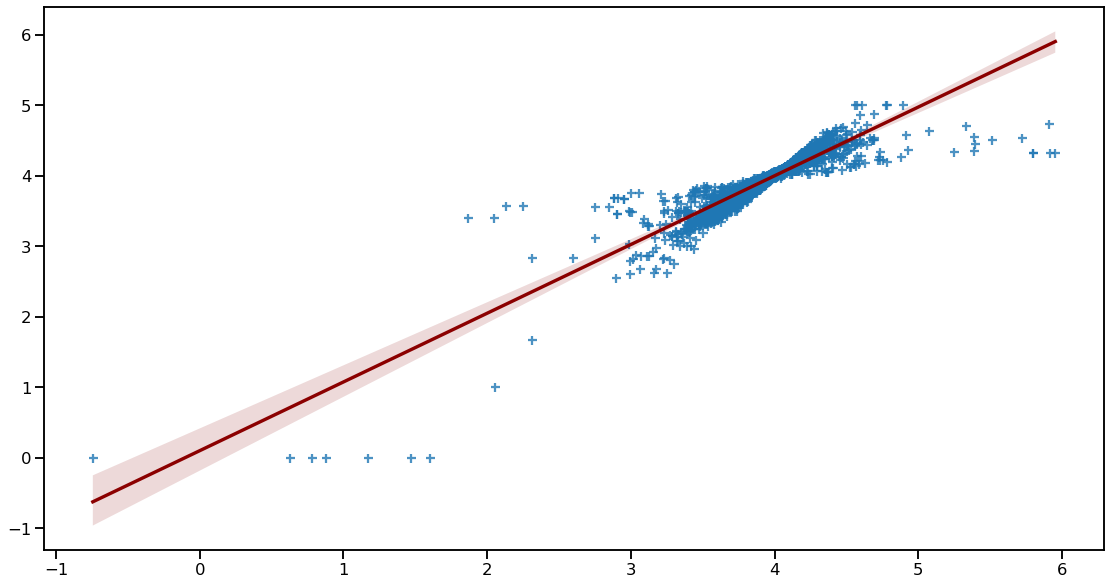

In [37]:
plt.figure(figsize=(19,10))
sns.regplot(pred_ridge,y_test, marker="+", line_kws={'color':'darkred','alpha':1.0})

# Random Forest Model
pred_rf = grad_rf.predict(X_test)

# Check Model Score
print("Residual sum of squares: ",  np.mean((pred_rf - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, pred_rf))))
print('Model Score on Test Data: ', grad_rf.score(X_test, y_test))

perm = PermutationImportance(grad_ridge.best_estimator_, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

plt.figure(figsize=(19,10))
sns.regplot(pred_rf,y_test, marker="+", line_kws={'color':'darkred','alpha':1.0})

In [38]:
l2 = []
l2.append(('AdaBoost', grad_Ada.score(X_test, y_test)*100))
l2.append(('Linear Regression', grad_Linear.score(X_test, y_test)*100))
l2.append(('Ridge Regression', grad_ridge.score(X_test, y_test)*100))

test_scores = pd.DataFrame(l2, columns =['Model', 'Test Score'])

In [39]:
scores['Test Score'] = test_scores['Test Score']
scores

,Model,Train Score,Test Score
0,AdaBoost,94.084190,94.727289
1,Linear Regression,81.049784,82.023755
2,Ridge Regression,81.050126,82.025244


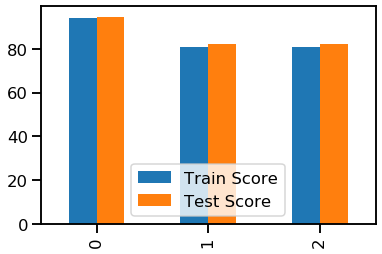

In [40]:
scores.plot.bar()